In [1]:
import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')
from __init__ import *
from __init__jupyterlab import *

import fbpca

import snmcseq_utils

In [2]:
output_figures = '/cndd2/fangming/projects/miniatlas/results/figures/{}.pdf'

In [3]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/cluster_annotation_scf_round3.tsv'
df_annot = pd.read_csv(f, sep='\t')
print(df_annot.shape)
df_annot = df_annot.set_index('cluster')['annot']
df_annot.head()

(56, 3)


cluster
1-1-1       L4/5 IT (1)
1-2-1       L4/5 IT (2)
1-2-2       L4/5 IT (3)
2-1-1    L6 CT Cpa6 (1)
2-1-2    L6 CT Cpa6 (2)
Name: annot, dtype: object

In [4]:
clsts_manual_order = collections.OrderedDict({
      '4-1-1': 'L2/3 IT ',
      '4-1-2': 'L2/3 IT ',
      '4-2-1': 'L2/3 IT ',
      '4-2-2': 'L2/3 IT ',
      '4-2-3': 'L2/3 IT ',
      '1-1-1': 'L5 IT Rspo1_1',
      '1-2-1': 'L5 IT Rspo2_1',
      '1-2-2': 'L5 IT Tcap_1',
      '3-1-2': 'L5 IT S100b',
      '3-2-1': 'L5 IT S100b',
      '3-2-2': 'L5 IT S100b',
      '3-1-1': 'L6 IT_2',
      '3-3-1': 'L6 IT Car3',
    
      '9-1-1': 'L5 ET_1',
      '9-2-1': 'L5 ET_2',
      '9-2-2': 'L5 ET_3',
    
      '2-1-1': 'L6 CT Cpa6',
      '2-1-2': 'L6 CT Cpa6',
      '2-2-1': 'L6 CT Cpa6',
      '2-2-2': 'L6 CT Cpa6',
      '2-2-3': 'L6 CT Gpr139',
      '2-2-4': 'L6 CT Cpa6',
      '2-3-1': 'L6 CT Nxph2 Pou3f2',
      '2-3-2': 'L6 CT Nxph2 Pou3f2',
      '2-3-3': 'L6 CT Nxph2 Kit',
    
      '8-1-1': 'L6b Shisa6_1',
      '8-1-2': 'L6b Shisa6_2_2',
      '8-2-1': 'L6b Ror1',
      '8-3-1': 'L6b Kcnip1_2',
      '8-3-2': 'L6b Kcnip1_2',
    
      '7-1-1': 'L6 NP Trh_1',
      '7-1-2': 'L5 NP Trh',
      '7-2-1': 'L5 NP Slc17a8',
      '7-2-2': 'L5 NP Slc17a8',
    
      '5-4-1': 'Pvalb Gabrg1',
      '5-1-1': 'Pvalb Reln',
      '5-1-2': 'Pvalb Calb1_1',
      '5-5-1': 'Pvalb Vipr2',
    
      '5-2-1': 'Sst Myh8_2',
      '5-2-2': 'Sst Crhr2_1',
      '5-2-3': 'Sst Crhr2_2',
      '5-3-1': 'Sst Calb2',
      '5-3-2': 'Sst Hspe_3',
      '10-1-1': 'Sst Chodl',
    
      '6-1-1': 'Vip Chat',
      '6-1-2': 'Vip Crispld2',
      '6-3-1': 'Vip Gpc3',
      '6-3-2': 'Vip Htr1f_1',
      '6-5-3': 'Sncg Npy2r',
      '6-3-3': 'Vip Igfbp6',
      '6-5-2': 'Vip Serpinf1_2',
      '6-5-1': 'Sncg Col14a1',
    
      '6-6-1': 'Lamp5 Lhx6',
      '6-2-1': 'Lamp5 Slc35d3',
      '6-4-1': 'Lamp5 Pdlim5',
      '6-4-2': 'Lamp5 Pax6',
    
})

clsts_uniq = np.array(list(clsts_manual_order.keys()))
clsts_uniq

array(['4-1-1', '4-1-2', '4-2-1', '4-2-2', '4-2-3', '1-1-1', '1-2-1',
       '1-2-2', '3-1-2', '3-2-1', '3-2-2', '3-1-1', '3-3-1', '9-1-1',
       '9-2-1', '9-2-2', '2-1-1', '2-1-2', '2-2-1', '2-2-2', '2-2-3',
       '2-2-4', '2-3-1', '2-3-2', '2-3-3', '8-1-1', '8-1-2', '8-2-1',
       '8-3-1', '8-3-2', '7-1-1', '7-1-2', '7-2-1', '7-2-2', '5-4-1',
       '5-1-1', '5-1-2', '5-5-1', '5-2-1', '5-2-2', '5-2-3', '5-3-1',
       '5-3-2', '10-1-1', '6-1-1', '6-1-2', '6-3-1', '6-3-2', '6-5-3',
       '6-3-3', '6-5-2', '6-5-1', '6-6-1', '6-2-1', '6-4-1', '6-4-2'],
      dtype='<U6')

In [5]:
mods_selected = [
    '10x_cells_v2', 
    '10x_cells_v3', 
    'smarter_cells',
    '10x_nuclei_v3', 
    '10x_nuclei_v3_macosko', 
    'smarter_nuclei',
    'mch',
    'snatac_gene',
]

In [6]:
dfs = {} 

data_dir = '/cndd2/fangming/miniatlas/cluster_level'
for mod in mods_selected:
    f1 = os.path.join(data_dir, 'gene_features_{}_round3.tsv'.format(mod))
    df1 = pd.read_csv(f1, sep='\t', index_col=0)
    print(mod, df1.shape)
    dfs[mod] = df1

10x_cells_v2 (31053, 56)
10x_cells_v3 (31053, 56)
smarter_cells (32324, 56)
10x_nuclei_v3 (31053, 56)
10x_nuclei_v3_macosko (24809, 56)
smarter_nuclei (32324, 56)
mch (55487, 56)
snatac_gene (53278, 56)


In [7]:
clusters = dfs[mods_selected[0]].columns.values

# get specs
specs = {}
for mod in mods_selected:
    absents = clusters[(~dfs[mod].isnull()).sum() == 0]
    specs[mod] = df_annot.reindex(absents)
    print(mod, specs[mod].index.values)
    
    fout = '/cndd2/fangming/projects/miniatlas/results/dendro_absents_{}.csv'.format(mod)
#     pd.Series(specs[mod].index.values).to_csv(fout, header=False, index=False)
    specs[mod].to_csv(fout, header=False, index=False)

10x_cells_v2 []
10x_cells_v3 ['3-2-2']
smarter_cells ['2-2-4' '3-2-2']
10x_nuclei_v3 []
10x_nuclei_v3_macosko ['2-2-4']
smarter_nuclei ['2-2-3' '2-2-4' '2-3-3' '3-2-2' '3-3-1']
mch ['2-2-3' '2-2-4' '8-3-2']
snatac_gene ['10-1-1' '3-2-2' '8-3-2']


In [8]:
# remove NAs, simple way
for mod in mods_selected:
    print(mod)
    
    # check cluster order
    assert np.all(clusters==dfs[mod].columns.values)
    
    # fillna
    x = dfs[mod].T
    x = x.fillna(x.mean())
    dfs[mod] = x.T.dropna()

10x_cells_v2
10x_cells_v3
smarter_cells
10x_nuclei_v3
10x_nuclei_v3_macosko
smarter_nuclei
mch
snatac_gene


In [9]:
reorder = snmcseq_utils.get_index_from_array(clusters, clsts_uniq)
# clusters[reorder]
fout = '/cndd2/fangming/projects/miniatlas/results/dendro_new_order.csv'
new_order = (np.arange(56)+1)[reorder]
np.savetxt(fout, new_order, delimiter=',')

fout = '/cndd2/fangming/projects/miniatlas/results/dendro_new_order_labels.csv'
new_order_labels = df_annot.loc[clsts_uniq]
print(new_order_labels)
new_order_labels.to_csv(fout, header=False, index=False)

cluster
4-1-1                L2/3 IT (1)
4-1-2                L2/3 IT (2)
4-2-1                L2/3 IT (3)
4-2-2                L2/3 IT (4)
4-2-3                L2/3 IT (5)
1-1-1                L4/5 IT (1)
1-2-1                L4/5 IT (2)
1-2-2                L4/5 IT (3)
3-1-2                  L5 IT (1)
3-2-1                  L5 IT (2)
3-2-2                  L5 IT (3)
3-1-1                      L6 IT
3-3-1                 L6 IT Car3
9-1-1                  L5 PT (1)
9-2-1                  L5 PT (2)
9-2-2                  L5 PT (3)
2-1-1             L6 CT Cpa6 (1)
2-1-2             L6 CT Cpa6 (2)
2-2-1             L6 CT Cpa6 (3)
2-2-2             L6 CT Cpa6 (4)
2-2-3               L6 CT Gpr139
2-2-4             L6 CT Cpa6 (5)
2-3-1     L6 CT Nxph2 Pou3f2 (1)
2-3-2     L6 CT Nxph2 Pou3f2 (2)
2-3-3            L6 CT Nxph2 Kit
8-1-1             L6b Shisa6 (1)
8-1-2             L6b Shisa6 (2)
8-2-1                   L6b Ror1
8-3-1             L6b Kcnip1 (2)
8-3-2             L6b Kcnip1 (1)
7-

In [10]:
# compute PCs
# compute tree
from scipy.cluster import hierarchy as sch

pcs = {} 
zs = {} 

for i, mod in enumerate(mods_selected):
    df = dfs[mod]
    
    U, s, Vt = fbpca.pca(df.values.T, k=20)
    pc = U.dot(np.diag(s))
    z = sch.linkage(pc, method='ward')
    pcs[mod] = pc
    zs[mod] = z
    
    fout = '/cndd2/fangming/projects/miniatlas/results/z_{}.csv'.format(mod)
    znew = z.copy()
    znew = znew[:, :3]
    znew[:, :3] += 1
    np.savetxt(fout, znew, delimiter=',')
    

In [11]:
def labels_from_dendro(g):
    return clusters[g['leaves']] + '_' + df_annot.reindex(clusters[g['leaves']]).values

def labels_from_dendro2(g):
    return df_annot.reindex(clusters[g['leaves']]).values

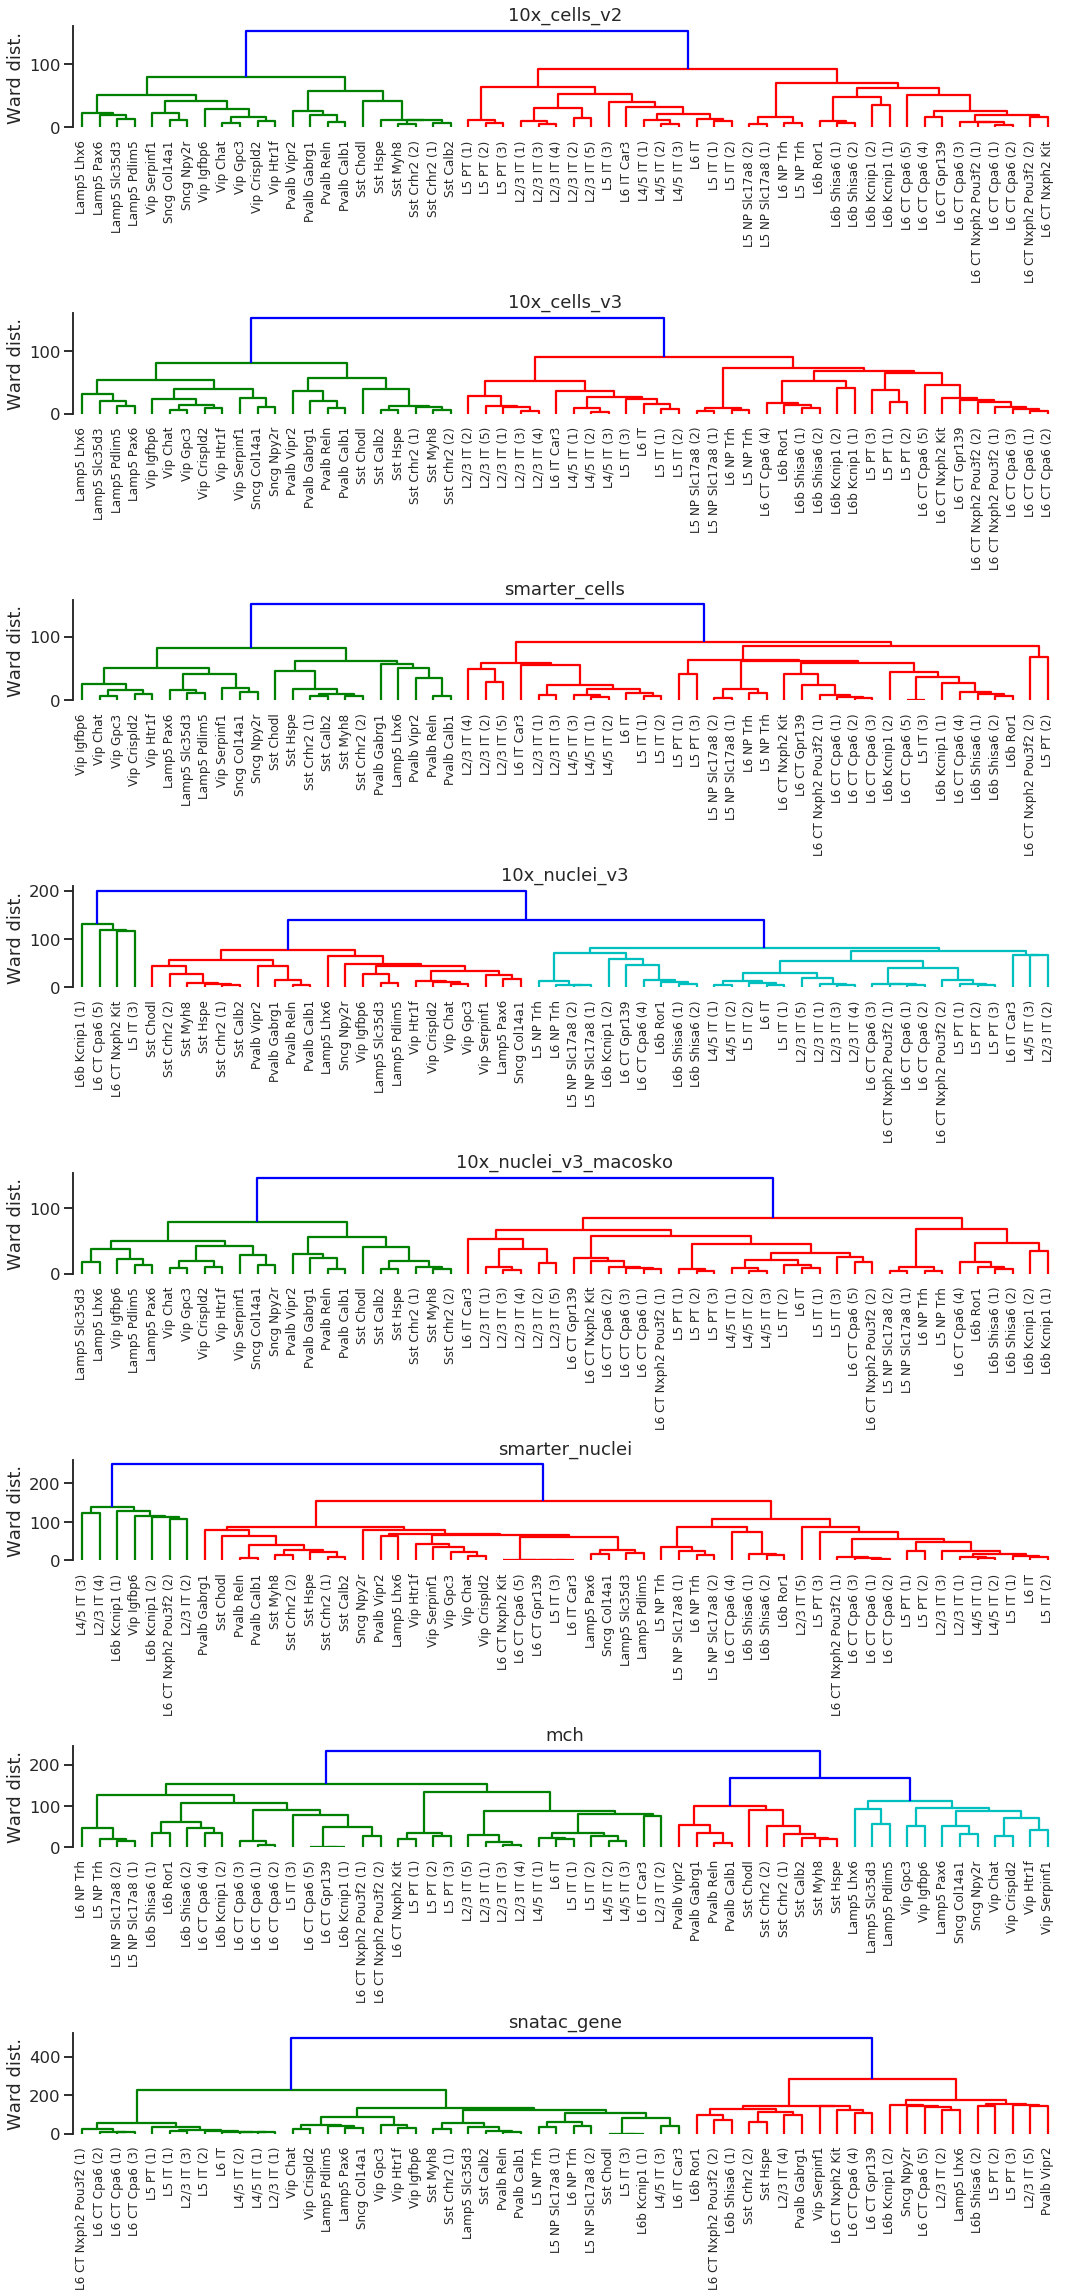

In [12]:
n = len(mods_selected)

fig, axs = plt.subplots(n, 1, figsize=(1*15, n*4))
# titles = ['RNA 10x cells V2', 'DNA methylation (gene body mCH)', 'Open chromatin (gene body)']
for ax, mod in zip(axs, mods_selected):
    title = mod
    z = zs[mod]
    
    g = sch.dendrogram(z, ax=ax)
    ax.grid(False)
    ax.set_xticklabels(labels_from_dendro2(g), fontsize=12)
    ax.set_title(title)
    ax.set_ylabel('Ward dist.')
    sns.despine(ax=ax, bottom=True)
#     break
fig.tight_layout()
snmcseq_utils.savefig(fig, output_figures.format('dendrogram_mockup'))
# plt.show()